## **Acquire MNIST Dataset**

In [1]:
import tensorflow as tf
from sklearn.model_selection import train_test_split

tf.random.set_seed(42)

mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0  # Normalize

# Flatten the images
x_train = x_train.reshape(-1, 784)
x_test = x_test.reshape(-1, 784)

# Convert labels to categorical
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

x_train_full = x_train.copy()
y_train_full = y_train.copy()

# Split the training data into training and validation sets
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

11490434/11490434 [==============================] - 1s 0us/step


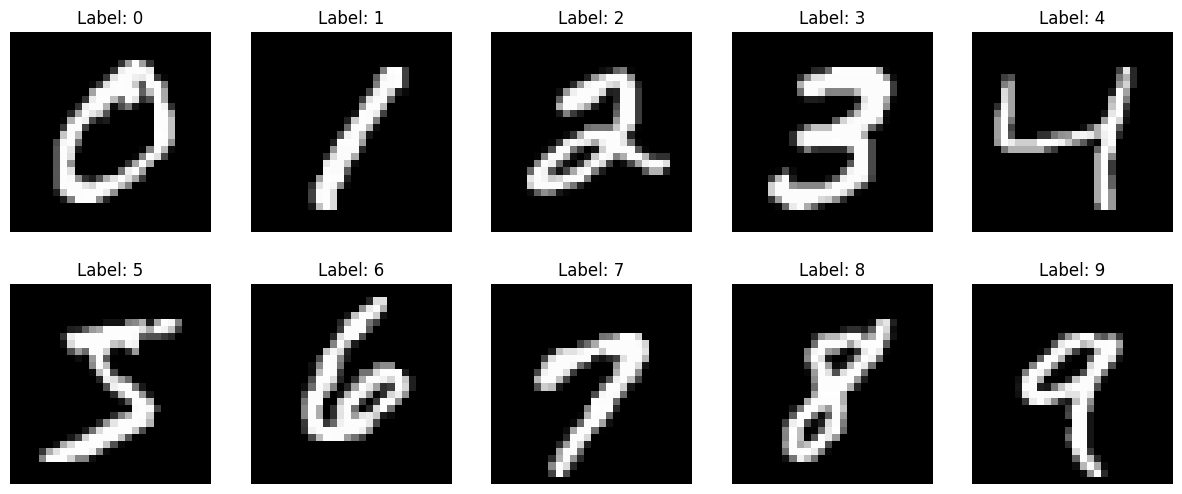

In [2]:
import matplotlib.pyplot as plt
import numpy as np

(x_train_plt, y_train_plt), _ = mnist.load_data()

unique_indices = []
for label in range(10):
    index = np.where(y_train_plt == label)[0][0]
    unique_indices.append(index)

plt.figure(figsize=(15, 6))
for i, index in enumerate(unique_indices):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_train_plt[index], cmap='gray')
    plt.title(f'Label: {y_train_plt[index]}')
    plt.axis('off')

plt.show()

## **Claim 1 (6.1.1): Dropout NN performs better than Standard NN on MNIST**

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

### Standard NN

In [ ]:
# Start building the model
standard_model = Sequential()

# First hidden layer with sigmoid activation
standard_model.add(Dense(800, activation='sigmoid'))

# Second hidden layer with sigmoid activation
standard_model.add(Dense(800, activation='sigmoid'))

# Output layer with softmax activation for classification
standard_model.add(Dense(10, activation='softmax'))

# Compile the model
standard_model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
standard_model.fit(x_train, y_train, epochs=100, batch_size=32, validation_data=(x_val, y_val))

Epoch 1/100
1250/1250 [==============================] - 7s 4ms/step - loss: 0.3960 - accuracy: 0.8808 - val_loss: 0.2112 - val_accuracy: 0.9363
Epoch 2/100
1250/1250 [==============================] - 5s 4ms/step - loss: 0.1712 - accuracy: 0.9485 - val_loss: 0.1502 - val_accuracy: 0.9534
Epoch 3/100
1250/1250 [==============================] - 5s 4ms/step - loss: 0.1095 - accuracy: 0.9661 - val_loss: 0.1227 - val_accuracy: 0.9603
Epoch 4/100
1250/1250 [==============================] - 6s 5ms/step - loss: 0.0793 - accuracy: 0.9753 - val_loss: 0.1105 - val_accuracy: 0.9651
Epoch 5/100
1250/1250 [==============================] - 5s 4ms/step - loss: 0.0563 - accuracy: 0.9821 - val_loss: 0.1020 - val_accuracy: 0.9704
Epoch 6/100
1250/1250 [==============================] - 6s 5ms/step - loss: 0.0407 - accuracy: 0.9868 - val_loss: 0.0946 - val_accuracy: 0.9723
Epoch 7/100
1250/1250 [==============================] - 5s 4ms/step - loss: 0.0305 - accuracy: 0.9901 - val_loss: 0.0945 - val_ac

In [ ]:
_, test_accuracy_standard = standard_model.evaluate(x_test, y_test)
error_percentage_standard = round((1 - test_accuracy_standard) * 100, 2)

print(f"Test Accuracy for Standard NN: {test_accuracy_standard * 100:.2f}%")
print(f"Error Percentage for Standard NN: {error_percentage_standard}%")

313/313 [==============================] - 1s 3ms/step - loss: 0.1824 - accuracy: 0.9829
Test Accuracy for Standard NN: 98.29%
Error Percentage for Standard NN: 1.71%


### Dropout NN with Logistic Unit Type

In [ ]:
tf.random.set_seed(42)

dropout_model = Sequential()

# Apply dropout to the input with p = 0.8 (keeping 20% of the inputs)
dropout_model.add(Dropout(0.2, input_shape=(784,)))

# First hidden layer
dropout_model.add(Dense(1024, activation='sigmoid'))
dropout_model.add(Dropout(0.5))

# Second hidden layer
dropout_model.add(Dense(1024, activation='sigmoid'))
dropout_model.add(Dropout(0.5))

# Third hidden layer
dropout_model.add(Dense(1024, activation='sigmoid'))
dropout_model.add(Dropout(0.5))

# Output layer
dropout_model.add(Dense(10, activation='softmax'))

dropout_model.compile(optimizer = 'adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
dropout_model.fit(x_train, y_train, epochs=100, batch_size=32, validation_data=(x_val, y_val))

Epoch 1/100
1250/1250 [==============================] - 7s 4ms/step - loss: 0.6279 - accuracy: 0.7921 - val_loss: 0.2551 - val_accuracy: 0.9187
Epoch 2/100
1250/1250 [==============================] - 7s 5ms/step - loss: 0.2731 - accuracy: 0.9155 - val_loss: 0.1706 - val_accuracy: 0.9467
Epoch 3/100
1250/1250 [==============================] - 5s 4ms/step - loss: 0.2118 - accuracy: 0.9349 - val_loss: 0.1359 - val_accuracy: 0.9556
Epoch 4/100
1250/1250 [==============================] - 7s 5ms/step - loss: 0.1794 - accuracy: 0.9456 - val_loss: 0.1275 - val_accuracy: 0.9616
Epoch 5/100
1250/1250 [==============================] - 6s 4ms/step - loss: 0.1545 - accuracy: 0.9520 - val_loss: 0.1096 - val_accuracy: 0.9639
Epoch 6/100
1250/1250 [==============================] - 6s 5ms/step - loss: 0.1400 - accuracy: 0.9561 - val_loss: 0.0991 - val_accuracy: 0.9695
Epoch 7/100
1250/1250 [==============================] - 5s 4ms/step - loss: 0.1242 - accuracy: 0.9620 - val_loss: 0.0915 - val_ac

In [ ]:
_, test_accuracy_dropout_log = dropout_model.evaluate(x_test, y_test)
error_percentage_dropout_log = round((1 - test_accuracy_dropout_log) * 100, 2)

print(f"Test Accuracy: {test_accuracy_dropout_log}")
print(f"Error Percentage: {error_percentage_dropout_log}%")

313/313 [==============================] - 1s 3ms/step - loss: 0.1012 - accuracy: 0.9838
Test Accuracy: 0.9837999939918518
Error Percentage: 1.62%


### Dropout NN with ReLU Unit Type

In [6]:
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers.schedules import ExponentialDecay

def get_sgd_optimizer():
  """
  This function returns the SGD optimizer used in the Dropout paper
  for the neural net tested on the MNIST dataset using the ReLU
  activation function.
  """
  lr_schedule = ExponentialDecay(
      initial_learning_rate=0.1,
      decay_steps=100000,
      decay_rate=0.5,
      staircase=False
  )

  optimizer = SGD(
      learning_rate=lr_schedule,
      momentum=0.5
  )

  return optimizer

In [ ]:
tf.random.set_seed(42)

# Get SGD optimizer for ReLU used in the paper
sgd_optimizer = get_sgd_optimizer()

dropout_model = Sequential()

# Apply dropout to the input with p = 0.8 (keeping 20% of the inputs)
dropout_model.add(Dropout(0.2, input_shape=(784,)))

# First hidden layer
dropout_model.add(Dense(1024, activation='relu'))
dropout_model.add(Dropout(0.5))

# Second hidden layer
dropout_model.add(Dense(1024, activation='relu'))
dropout_model.add(Dropout(0.5))

# Third hidden layer
dropout_model.add(Dense(1024, activation='relu'))
dropout_model.add(Dropout(0.5))

# Output layer
dropout_model.add(Dense(10, activation='softmax'))

dropout_model.compile(optimizer=sgd_optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
dropout_model.fit(x_train, y_train, epochs=100, batch_size=32, validation_data=(x_val, y_val))

Epoch 1/100
3/3 [==============================] - 6s 117ms/step - loss: 2.3919 - accuracy: 0.1250 - val_loss: 2.4345 - val_accuracy: 0.0000e+00
Epoch 2/100
3/3 [==============================] - 0s 16ms/step - loss: 2.1373 - accuracy: 0.2500 - val_loss: 2.1965 - val_accuracy: 0.0000e+00
Epoch 3/100
3/3 [==============================] - 0s 24ms/step - loss: 2.0334 - accuracy: 0.2875 - val_loss: 2.2558 - val_accuracy: 0.2000
Epoch 4/100
3/3 [==============================] - 0s 16ms/step - loss: 1.9480 - accuracy: 0.3250 - val_loss: 2.1276 - val_accuracy: 0.2000
Epoch 5/100
3/3 [==============================] - 0s 20ms/step - loss: 1.6165 - accuracy: 0.5000 - val_loss: 1.4566 - val_accuracy: 0.7000
Epoch 6/100
3/3 [==============================] - 0s 18ms/step - loss: 1.1791 - accuracy: 0.6625 - val_loss: 1.4554 - val_accuracy: 0.5500
Epoch 7/100
3/3 [==============================] - 0s 16ms/step - loss: 0.9973 - accuracy: 0.7125 - val_loss: 1.1955 - val_accuracy: 0.7000
Epoch 8/100

KeyboardInterrupt: ignored

In [ ]:
_, test_accuracy_dropout_relu = dropout_model.evaluate(x_test, y_test)
error_percentage_dropout_relu = round((1 - test_accuracy_dropout_relu) * 100, 2)

print(f"Test Accuracy: {test_accuracy_dropout_relu}")
print(f"Error Percentage: {error_percentage_dropout_relu}%")

313/313 [==============================] - 1s 3ms/step - loss: 2.3015 - accuracy: 0.0990
Test Accuracy: 0.0989999994635582
Error Percentage: 90.1%


### Compare Standard NN and Dropout NN

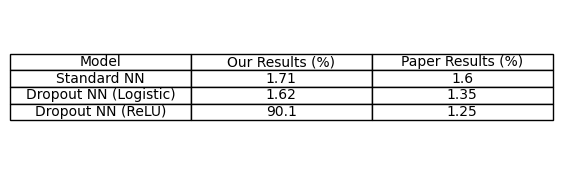

In [ ]:
import pandas as pd

# Results from the paper
error_percentage_standard_paper = 1.60
error_percentage_dropout_log_paper = 1.35
error_percentage_dropout_relu_paper = 1.25

data = {
    'Model': ['Standard NN', 'Dropout NN (Logistic)', 'Dropout NN (ReLU)'],
    'Our Results (%)': [error_percentage_standard, error_percentage_dropout_log, error_percentage_dropout_relu],
    'Paper Results (%)': [error_percentage_standard_paper, error_percentage_dropout_log_paper, error_percentage_dropout_relu_paper]
}

df = pd.DataFrame(data)

fig, ax = plt.subplots(figsize=(7, 2))
ax.axis('tight')
ax.axis('off')
ax.table(cellText=df.values, colLabels=df.columns, cellLoc = 'center', loc='center')

plt.show()

## **Claim 2 (6.5): After training Neurel nets with different regularization techniques on the MNIST dataset, dropout combined with max-norm regularization gives the lowest generalization error**

In [ ]:
from tensorflow.keras.constraints import MaxNorm
from tensorflow.keras.regularizers import l2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers.schedules import ExponentialDecay

In [5]:
def build_model(regularization=None):

    """
    This function builds the network architecture (784-1024-1024-2048-10)
    model given the regularizatio method.
    """
    model = Sequential()

    if 'dropout' in regularization:
        model.add(Dropout(0.2, input_shape=(784,)))

    model.add(Dense(1024, input_shape=(784,), activation='relu',
                    kernel_constraint=MaxNorm(3.5) if 'maxnorm' in regularization else None,
                    kernel_regularizer=l2(0.001) if 'l2' in regularization else None))

    if 'dropout' in regularization:
        model.add(Dropout(0.5))

    model.add(Dense(1024, activation='relu',
                    kernel_constraint=MaxNorm(3.5) if 'maxnorm' in regularization else None,
                    kernel_regularizer=l2(0.001) if 'l2' in regularization else None))

    if 'dropout' in regularization:
        model.add(Dropout(0.5))

    model.add(Dense(2048, activation='relu',
                    kernel_constraint=MaxNorm(5) if 'maxnorm' in regularization else None,
                    kernel_regularizer=l2(0.001) if 'l2' in regularization else None))

    if 'dropout' in regularization:
        model.add(Dropout(0.5))

    model.add(Dense(10, activation='softmax'))

    return model

In [ ]:
regularizations = ['l2', 'maxnorm', 'dropout_l2', 'dropout_maxnorm']
error_percentages = {}

for reg in regularizations:

    tf.random.set_seed(42)

    model = build_model(regularization=reg)

    sgd_optimizer = get_sgd_optimizer()

    model.compile(optimizer=sgd_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

    # Train the model
    model.fit(x_train, y_train, epochs=100, batch_size=32, validation_data=(x_test, y_test))

    # Evaluate the model
    _, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
    error_percentages[reg] = (1 - test_accuracy) * 100
    print(f"{reg}: Test Error Percentage = {error_percentages[reg]:.2f}%")

Epoch 1/100
1250/1250 [==============================] - 7s 5ms/step - loss: 2.4174 - accuracy: 0.9176 - val_loss: 1.4535 - val_accuracy: 0.9584
Epoch 2/100
1250/1250 [==============================] - 7s 5ms/step - loss: 1.0181 - accuracy: 0.9583 - val_loss: 0.6936 - val_accuracy: 0.9631
Epoch 3/100
1250/1250 [==============================] - 6s 5ms/step - loss: 0.5233 - accuracy: 0.9657 - val_loss: 0.4266 - val_accuracy: 0.9579
Epoch 4/100
1250/1250 [==============================] - 6s 5ms/step - loss: 0.3361 - accuracy: 0.9692 - val_loss: 0.3086 - val_accuracy: 0.9641
Epoch 5/100
1250/1250 [==============================] - 6s 5ms/step - loss: 0.2686 - accuracy: 0.9677 - val_loss: 0.2643 - val_accuracy: 0.9665
Epoch 6/100
1250/1250 [==============================] - 6s 4ms/step - loss: 0.2374 - accuracy: 0.9708 - val_loss: 0.2400 - val_accuracy: 0.9671
Epoch 7/100
1250/1250 [==============================] - 6s 5ms/step - loss: 0.2244 - accuracy: 0.9718 - val_loss: 0.2356 - val_ac

### Plot Results in a Table

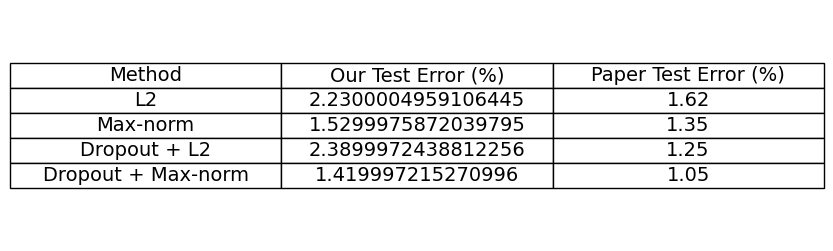

In [ ]:
import matplotlib.pyplot as plt

# Paper's reported error percentages
paper_error_percentages = {
    'l2': 1.62,
    'maxnorm': 1.35,
    'dropout_l2': 1.25,
    'dropout_maxnorm': 1.05
}

df = pd.DataFrame({
    'Method': ['L2', 'Max-norm', 'Dropout + L2', 'Dropout + Max-norm'],
    'Our Test Error (%)': [error_percentages['l2'], error_percentages['maxnorm'], error_percentages['dropout_l2'], error_percentages['dropout_maxnorm']],
    'Paper Test Error (%)': [paper_error_percentages['l2'], paper_error_percentages['maxnorm'], paper_error_percentages['dropout_l2'], paper_error_percentages['dropout_maxnorm']]
})

fig, ax = plt.subplots(figsize=(7, 3))
ax.axis('tight')
ax.axis('off')
the_table = ax.table(cellText=df.values, colLabels=df.columns, loc='center', cellLoc='center')
the_table.set_fontsize(15)
the_table.scale(1.5, 1.5)
plt.show()

## **Claim 3 (7.4): 7.4 Effect of Data Set Size**

Epoch 1/100
3/3 [==============================] - 7s 273ms/step - loss: 2.3048 - accuracy: 0.1444 - val_loss: 2.3432 - val_accuracy: 0.0000e+00
Epoch 2/100
3/3 [==============================] - 0s 32ms/step - loss: 2.1799 - accuracy: 0.1333 - val_loss: 2.1561 - val_accuracy: 0.4000
Epoch 3/100
3/3 [==============================] - 0s 36ms/step - loss: 1.9679 - accuracy: 0.3556 - val_loss: 1.9437 - val_accuracy: 0.6000
Epoch 4/100
3/3 [==============================] - 0s 26ms/step - loss: 1.8588 - accuracy: 0.3667 - val_loss: 1.7104 - val_accuracy: 0.6000
Epoch 5/100
3/3 [==============================] - 0s 31ms/step - loss: 1.3669 - accuracy: 0.6222 - val_loss: 1.8171 - val_accuracy: 0.5000
Epoch 6/100
3/3 [==============================] - 0s 32ms/step - loss: 1.0905 - accuracy: 0.6778 - val_loss: 1.5313 - val_accuracy: 0.7000
Epoch 7/100
3/3 [==============================] - 0s 34ms/step - loss: 0.8757 - accuracy: 0.7444 - val_loss: 1.4871 - val_accuracy: 0.7000
Epoch 8/100
3/3

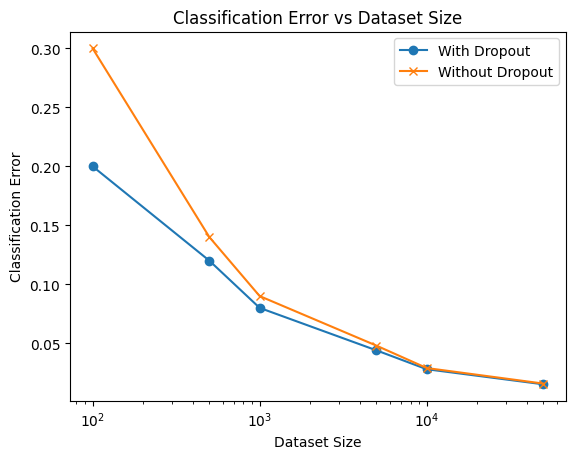

In [7]:
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import SGD

# Function to create the model with optional dropout
def create_model(with_dropout=True, dropout_rate_input = 0.1, dropout_rate_hidden=0.5):
    model = Sequential()
    if with_dropout:
        model.add(Dropout(dropout_rate_input, input_shape=(784,)))  # Input dropout
    model.add(Dense(1024, activation='relu'))
    if with_dropout:
        model.add(Dropout(dropout_rate_hidden))
    model.add(Dense(1024, activation='relu'))
    if with_dropout:
        model.add(Dropout(dropout_rate_hidden))
    model.add(Dense(2048, activation='relu'))
    if with_dropout:
        model.add(Dropout(dropout_rate_hidden))
    model.add(Dense(10, activation='softmax'))
    return model

# Function to compile and train the model
def compile_and_train(model, x_train, y_train, x_val, y_val, epochs=100, batch_size=32):
    model.compile(optimizer=
                  get_sgd_optimizer(),
                  loss='categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size,
                        validation_data=(x_val, y_val))
    _, accuracy = model.evaluate(x_val, y_val)
    # Calculate classification error
    classification_error = 1 - accuracy
    return classification_error

# Main loop to iterate over different dataset sizes and dropout configurations
dataset_sizes = [100, 500, 1000, 5000, 10000, 50000]
classification_errors_with_dropout = []
classification_errors_without_dropout = []

for size in dataset_sizes:
    # Get a subset of the training data
    x_train = x_train_full[:size]
    y_train = y_train_full[:size]
    x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

    # Train model with dropout
    model_with_dropout = create_model(with_dropout=True, dropout_rate_input= 0.1, dropout_rate_hidden=0.5)
    error_with_dropout = compile_and_train(model_with_dropout, x_train, y_train, x_val, y_val)
    classification_errors_with_dropout.append((size, error_with_dropout))

    # Train model without dropout
    model_without_dropout = create_model(with_dropout=False)
    error_without_dropout = compile_and_train(model_without_dropout, x_train, y_train, x_val, y_val)
    classification_errors_without_dropout.append((size, error_without_dropout))

# Plotting
sizes_with_dropout, error_values_with_dropout = zip(*classification_errors_with_dropout)  # Unzip the sizes and errors
sizes_without_dropout, error_values_without_dropout = zip(*classification_errors_without_dropout)  # Unzip the sizes and errors

plt.plot(sizes_with_dropout, error_values_with_dropout, marker='o', label='With Dropout')
plt.plot(sizes_without_dropout, error_values_without_dropout, marker='x', label='Without Dropout')
plt.xscale('log')  # Logarithmic scale since dataset sizes vary widely
plt.xlabel('Dataset Size')
plt.ylabel('Classification Error')
plt.title('Classification Error vs Dataset Size')
plt.legend()
plt.show()
